Data generated with metrics3k_save_all_F1_appr.ipynb


(from metrics3k_plots2)

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Data

In [2]:
DATA_PATH = "./data/"

## hacer las medias primero por fold y luego la media de las medias por fold (no la media de todo junto, ver si eso cambia)

In [8]:
dataplt = pd.read_csv(DATA_PATH + "archiveII_f_all.csv")
simplt = pd.read_csv(DATA_PATH + "archiveII_all_similarities.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/archiveII_f_all.csv'

In [ ]:
# remove mxfold
dataplt = dataplt.loc[dataplt.method != "mxfold2"]

In [ ]:
dataplt = dataplt.replace("fam-fold", "family-fold")
dataplt = dataplt.replace("hl10-fold", "HL10-fold")
dataplt = dataplt.replace("hl25-fold", "HL25-fold")
dataplt = dataplt.replace("hl50-fold", "HL50-fold")
dataplt = dataplt.replace("hl75-fold", "HL75-fold")
dataplt = dataplt.replace("hl90-fold", "HL90-fold")
dataplt

,Unnamed: 0,method,split-type,F1
0,0,RNAstructure,k-fold,0.865672
1,1,RNAstructure,k-fold,0.820513
2,2,RNAstructure,k-fold,0.818182
3,3,RNAstructure,k-fold,0.677165
4,4,RNAstructure,k-fold,0.776119
...,...,...,...,...
92124,3382,UFold,HL90-fold,1.000000
92125,3383,UFold,HL90-fold,0.937500
92126,3384,UFold,HL90-fold,0.489796
92127,3385,UFold,HL90-fold,0.972973


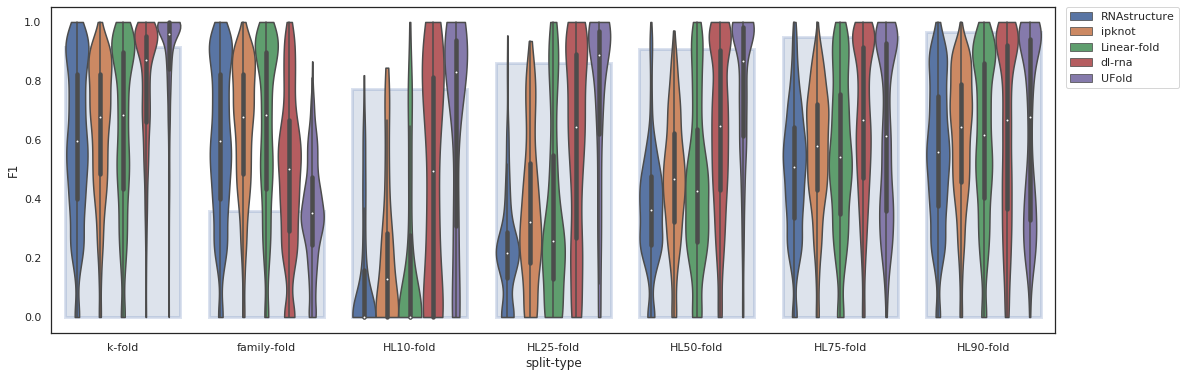

In [ ]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set_style(style='white') 

#sns.barplot(data=simplt, x="split-type", y="sim", color='b', alpha=0.3, zorder=-1)
bp = sns.barplot(data=simplt, x="split-type", y="sim", color='b', linewidth= 3, edgecolor = "b", alpha=0.2, zorder=-1)
vp = sns.violinplot(data=dataplt, x="split-type", y="F1", hue="method", scale="count", estimator=np.mean, cut=0, zorder=1)

vp.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

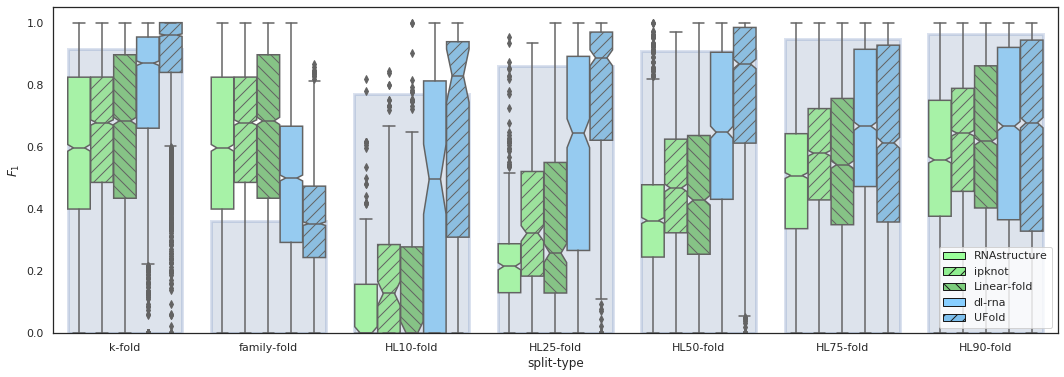

In [ ]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set_style(style='white') 

col = [np.array([154,255,154])/255, 
       np.array([144,238,144])/255, 
       np.array([124,205,124])/255, 
       np.array([135,206,255])/255, 
       np.array([126,192,238])/255
      ]
lbs = ["RNAstructure", "ipknot", "Linear-fold", "dl-rna", "UFold"]
pal = {}
for i, ll in enumerate(lbs): pal[ll] = col[i]

bp = sns.barplot(data=simplt, x="split-type", y="sim", color='b', linewidth= 3, edgecolor = "b", alpha=0.2, zorder=-1)
vp = sns.boxplot(data=dataplt, x="split-type", y="F1", hue="method", palette=pal, notch=True, zorder=1)
#  whis=6.0 (default 1.5) remove outliers, medians and boxes unchanged
vp.set_ylabel("$F_1$")

hts = ["", "//", "\\\\", "", "//"]*7
for hatch, patch in zip(hts, vp.artists): patch.set_hatch(hatch)

#vp.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
hdls = []
for i, ll in enumerate(lbs): hdls.append(mpatches.Patch(facecolor=col[i], edgecolor="k", hatch=hts[i], label=ll))
vp.legend(loc='lower right', handles=hdls)

In [ ]:
# ssorder = ["k-fold", "fam-fold", "hl10-fold", "hl25-fold", "hl50-fold", "hl75-fold", "hl90-fold"]
# for spl in ssorder:
#     print(spl)
#     for met in lbs:
#         print(met, dataplt.loc[(dataplt.method==met) & (dataplt["split-type"]==spl)].F1.median())
#     print()

In [ ]:
# sns.set(rc={'figure.figsize':(18,6)})
# sns.set_style(style='white') 

# xorder = ["fam-fold", "hl10-fold", "hl25-fold", "hl50-fold", "hl75-fold", "hl90-fold", "k-fold"]

# bp = sns.barplot(data=simplt, x="split-type", y="sim", color='b', order=xorder, linewidth= 3, edgecolor = "b", alpha=0.2, zorder=-1)
# vp = sns.boxplot(data=dataplt, x="split-type", y="F1", hue="method", order=xorder, zorder=1)

# vp.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)